In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1)

In [2]:
import numpy as np
X,y = mnist["data"],mnist["target"]

y = y.astype(np.uint8)
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params_grid = [
    {'n_neighbors':[3,5,7]},
    {'weights':['uniform','distance']}
]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf,params_grid,cv=10,scoring="accuracy")
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7]},
                         {'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [5]:
best = grid_search.best_estimator_

print("score:",best.score(X_test,y_test))

score: 0.9691


In [20]:
def one_pixle_move(direction,val):
    if direction == 0:
        step = val[:1]
        val = np.delete(val,0,axis=0)
        val = np.vstack((val,step))
    elif direction == 1:
        step = val[-1:]
        val = np.delete(val,-1,axis=0)
        val = np.vstack((step,val))
    elif direction == 2:
        step = val[:,0].reshape(len(val),1)
        val = np.delete(val,0,axis=1)
        val = np.hstack((val,step))
    elif direction == 3:
        step = val[:,-1].reshape(len(val),1)
        val = np.delete(val,-1,axis=1)
        val = np.hstack((step,val))
    
    return val

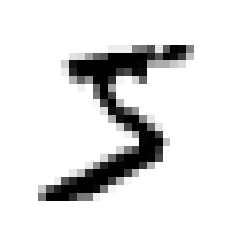

In [31]:
import matplotlib.pyplot as plt

test = X_train.values[0]
test = test.reshape(28,28)
plt.imshow(test,cmap="binary")
plt.axis("off")
plt.show()

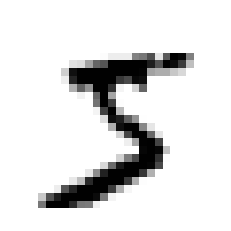

In [34]:
test = one_pixle_move(X_train.values[0].reshape(28,28))
plt.imshow(test,cmap="binary")
plt.axis("off")
plt.show()

In [46]:
import pandas as pd
X_train_test = X_train.copy()

In [67]:
step = X_train.copy()

In [71]:
from tqdm import tqdm
values = step.values

for i in tqdm(range(60000)):
    step_ = one_pixle_move(0,values[i].reshape(28,28))
    step.loc[i+1+60000] = step_.reshape(784,)

print(step)

  5%|▌         | 3100/60000 [01:04<19:40, 48.20it/s]   


KeyboardInterrupt: 

In [90]:
def add_moved_pixles(df):
    dir = [0,1,2,3]
    step = df[:60000].copy()
    for d in dir:
        for index,val in tqdm(step.iterrows()):
            step_ = one_pixle_move(d,val.reshape(28,28)).reshape(784,)
            df.loc[len(df)+1] = step_  